In [ ]:
# SARA KHALILI

In [40]:
# IMPORTING TOOLS
# Data Processing
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn import preprocessing

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Tree Visualisation
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [41]:
# LOADDING THE DATASET
letter_arrf = arff.loadarff('letter.arff')
df_train = pd.DataFrame(letter_arrf[0]).head(16000) # 20000 record, 16000 for training, 4000 for predict
df_train

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,b'Z'
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,b'P'
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,b'S'
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,b'H'
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,b'H'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,4.0,10.0,6.0,7.0,4.0,11.0,6.0,3.0,7.0,11.0,3.0,7.0,4.0,7.0,4.0,9.0,b'D'
15996,3.0,6.0,4.0,4.0,4.0,7.0,7.0,5.0,4.0,6.0,5.0,7.0,3.0,8.0,5.0,7.0,b'B'
15997,4.0,5.0,5.0,4.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,9.0,2.0,9.0,4.0,8.0,b'G'
15998,4.0,11.0,6.0,8.0,6.0,9.0,11.0,3.0,7.0,5.0,12.0,8.0,2.0,12.0,1.0,9.0,b'T'


In [42]:
# PREPROCESSING
# encoding nominal attribute class
lable_encoder = preprocessing.LabelEncoder()
df_train['class'] = lable_encoder.fit_transform(df_train['class'])

In [43]:
# TRAIN MODEL
features = df_train.columns.to_list()[0:15] # Independent attributes
X_train = df_train[features]
Y_train = df_train['class'] # Dependent attribute class (encoded)
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf

RandomForestClassifier()

In [44]:
# PREDICT
df_test = pd.DataFrame(letter_arrf[0]).tail(4000)
X_test = df_test[features]
df_test['class'] = lable_encoder.fit_transform(df_test['class'])
Y_test = df_test['class']
Y_pred = rf.predict(X_test)

In [45]:
# CHECK ACCURACY
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: %{accuracy*100}")

Accuracy: %96.25


C:\Users\mononoke hime\AppData\Local\Temp\ipykernel_29680\156268740.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


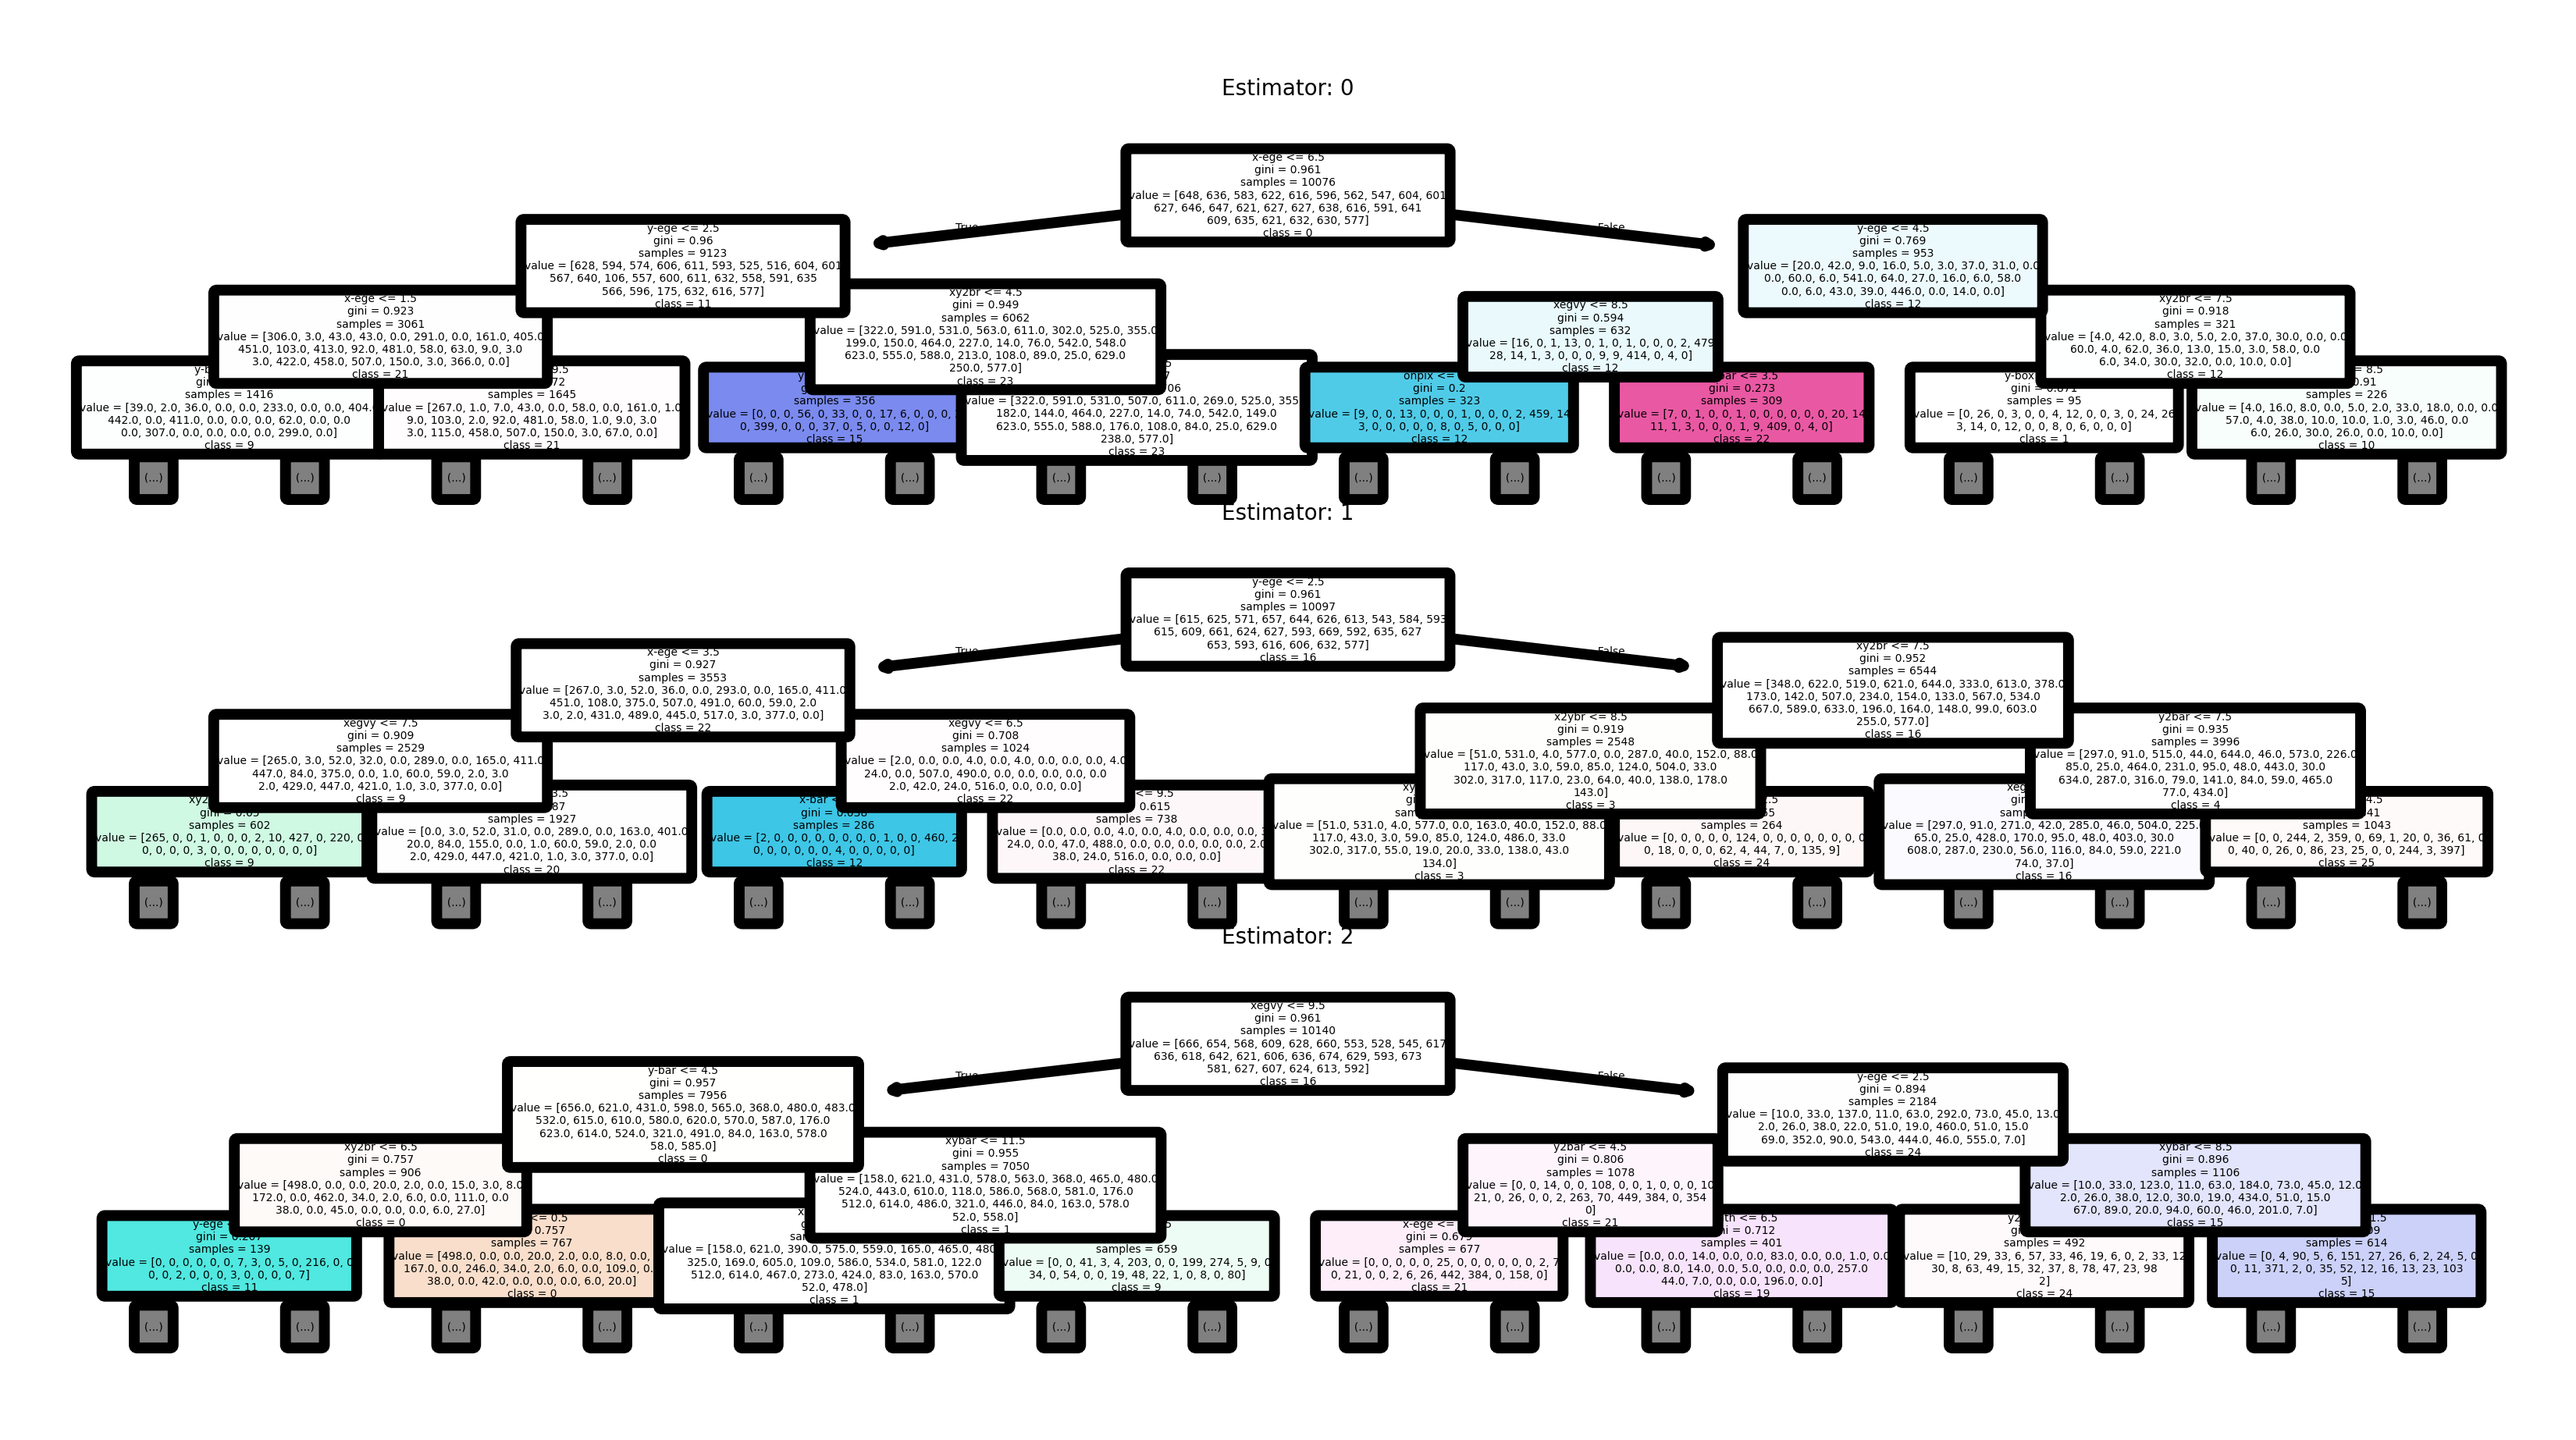

In [46]:
# VISUALIZATION
# Export the first three decision trees from the forest
class_names = [str(cls) for cls in rf.classes_]
fig, axes = plt.subplots(nrows = 3,ncols = 1,figsize = (4,2), dpi=1000)
for i in range(3):
      tree = rf.estimators_[i]
      plot_tree(tree, 
            feature_names= features,  # Use the feature names from the dataset
            class_names= class_names,  # Ue class names (species names)
            max_depth= 3,
            filled=True,              # Fill nodes with colors for better visualization
            rounded=True,
            ax= axes[i],
            )
      axes[i].set_title('Estimator: ' + str(i), fontsize = 2)
fig.savefig(f'classification_rf_3individualtree.png')
fig.show()